# Data Exploration

In this section, we load the dataset and inspect its structure, missing values, and key columns.


## Loading the Dataset

In this step, we load the crime dataset into a pandas DataFrame.

Since the full dataset is very large (hundreds of MBs and millions of records),
we load only the first 200,000 rows for faster development and experimentation.

This approach prevents memory overload and allows us to explore the data efficiently.


In [2]:
import pandas as pd

# Load first 200,000 rows (safe for large file)
df = pd.read_csv("../data/raw/chicago_crime.csv", nrows=200000)

print("Dataset Loaded Successfully ✅")

print("\nShape of dataset:")
print(df.shape)

print("\nColumns in dataset:")
print(df.columns)

print("\nFirst 5 rows:")
df.head()


Dataset Loaded Successfully ✅

Shape of dataset:
(200000, 23)

Columns in dataset:
Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='str')

First 5 rows:


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## Missing Value Analysis and Crime Type Exploration

In this section, we analyze:

1. Missing values in each column
2. The number of unique crime categories
3. The most frequent crime types
4. The data type of the Date column

This helps us understand data quality and prepare for cleaning and feature engineering.


In [3]:
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nNumber of unique crime types:")
print(df["Primary Type"].nunique())

print("\nTop 10 crime types:")
print(df["Primary Type"].value_counts().head(10))

print("\nDate column data type:")
print(df["Date"].dtype)



Missing values per column:
Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     173
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       5
Community Area            40
FBI Code                   0
X Coordinate            7348
Y Coordinate            7348
Year                       0
Updated On                 0
Latitude                7348
Longitude               7348
Location                7348
dtype: int64

Number of unique crime types:
32

Top 10 crime types:
Primary Type
THEFT                  41887
BATTERY                36568
NARCOTICS              22518
CRIMINAL DAMAGE        21067
ASSAULT                12630
OTHER OFFENSE          12074
BURGLARY               11262
DECEPTIVE PRACTICE   

# Week 1 - Day 2: Data Cleaning and Feature Engineering

In this section, we:
1. Remove unnecessary columns
2. Convert the Date column to datetime format
3. Extract time-based features
4. Clean missing geographical coordinates

These steps prepare the dataset for clustering and predictive modeling.


## Removing Unnecessary Columns

The column 'Unnamed: 0' is an index column generated during CSV export and does not contain meaningful information for analysis.


In [4]:
df = df.drop(columns=["Unnamed: 0"])

print("Column removed successfully")
print(df.columns)


Column removed successfully
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='str')


## Converting Date Column to Datetime

The Date column is currently stored as a string.
We convert it to datetime format to extract useful time-based features.


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

print("Date converted successfully")
print(df["Date"].dtype)


C:\Users\khakh\AppData\Local\Temp\ipykernel_8736\2888653630.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Date converted successfully
datetime64[us]


## Extracting Time-Based Features

We extract:
- Hour of crime
- Month
- Day
- Weekday name

These features will help in analyzing crime trends.


In [6]:
df["Hour"] = df["Date"].dt.hour
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

df[["Date", "Hour", "Month", "Weekday"]].head()


,Date,Hour,Month,Weekday
0,2016-05-03 23:40:00,23,5,Tuesday
1,2016-05-03 21:40:00,21,5,Tuesday
2,2016-05-03 23:31:00,23,5,Tuesday
3,2016-05-03 22:10:00,22,5,Tuesday
4,2016-05-03 22:00:00,22,5,Tuesday


## Removing Rows with Missing Coordinates

Latitude and Longitude are essential for hotspot detection.
Rows missing these values are removed.


In [7]:
print("Shape before cleaning:", df.shape)

df = df.dropna(subset=["Latitude", "Longitude"])

print("Shape after cleaning:", df.shape)


Shape before cleaning: (200000, 26)
Shape after cleaning: (192652, 26)


# Week 1 - Day 3: Exploratory Data Analysis (Visualization)

In this section, we analyze crime patterns using visualizations:
- Crime distribution by type
- Crime distribution by hour
- Crime distribution by weekday

This helps identify trends and potential risk patterns.


## Crime Distribution by Type
We visualize the top 10 most common crime categories.


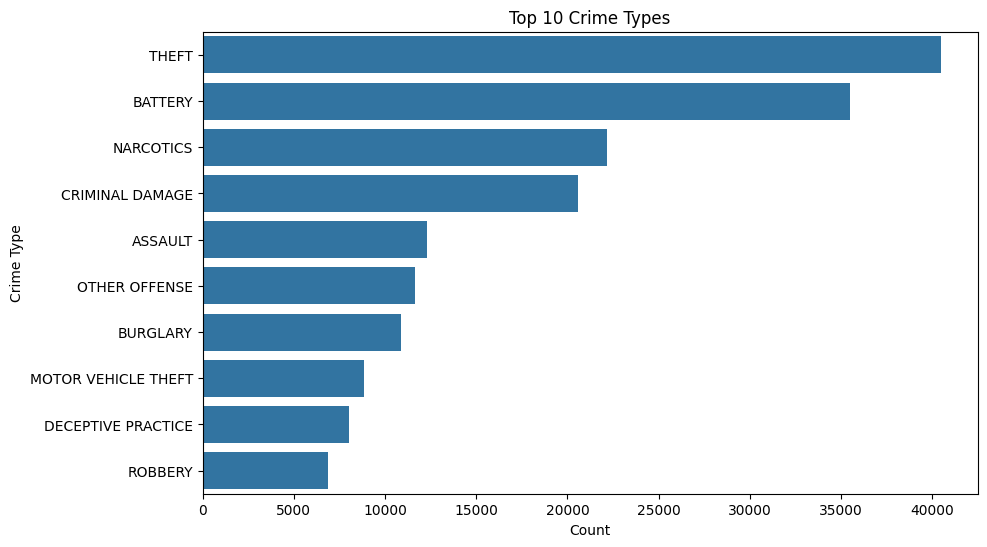

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y="Primary Type",
    order=df["Primary Type"].value_counts().index[:10]
)

plt.title("Top 10 Crime Types")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


## Crime Distribution by Hour
We analyze which hours of the day have the highest crime frequency.


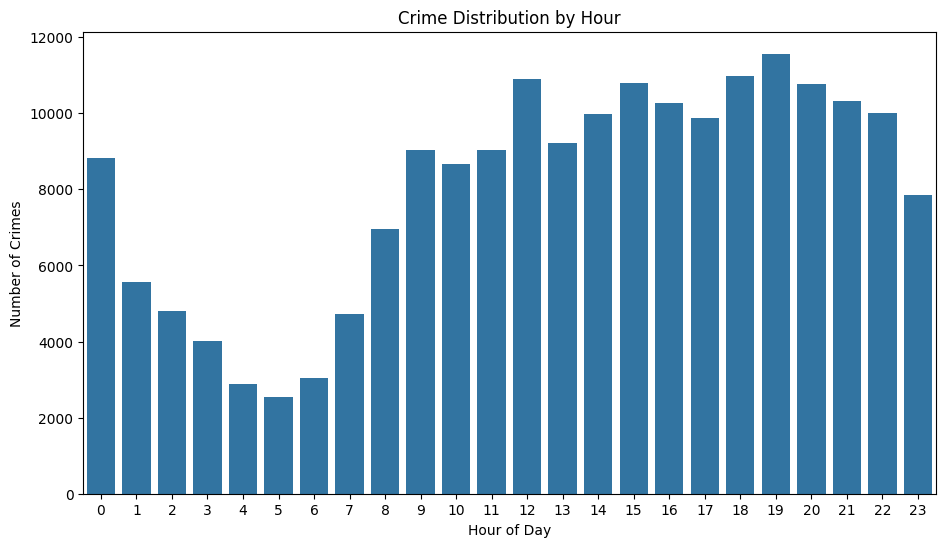

In [9]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x="Hour")

plt.title("Crime Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.show()


## Crime Distribution by Weekday
We analyze crime frequency across days of the week.


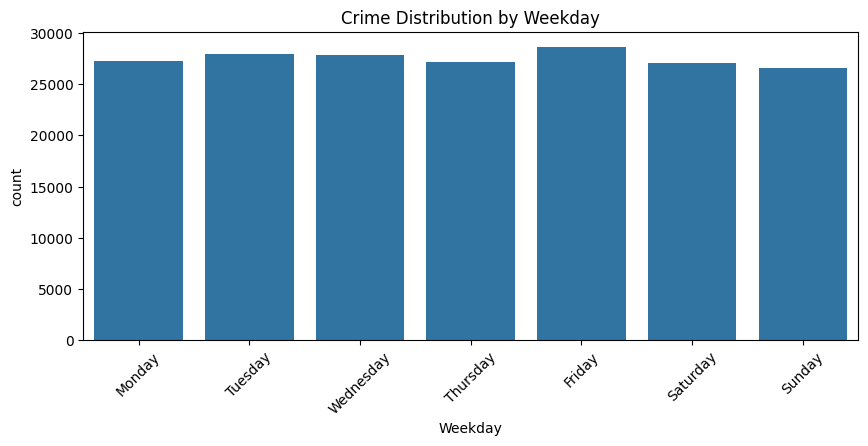

In [10]:
plt.figure(figsize=(10,4))

order = ["Monday", "Tuesday", "Wednesday", "Thursday",
         "Friday", "Saturday", "Sunday"]

sns.countplot(data=df, x="Weekday", order=order)

plt.title("Crime Distribution by Weekday")
plt.xticks(rotation=45)
plt.show()


## ✅ Week 1 (Completed)

Data Foundation Phase

Day 1 → Data loading & inspection

Day 2 → Cleaning & feature engineering

Day 3 → EDA (crime type, hour, weekday analysis)

✔ Fully completed.

# Phase 2/Week 2- Crime Hotspot Detection using KMeans Clustering

We apply KMeans clustering on geographical coordinates (Latitude and Longitude)
to identify crime hotspot regions.

Applied KMeans clustering on geographic coordinates.

Removed coordinate outliers for accurate grouping.

Calculated cluster-wise crime distribution.

Identified cluster with highest crime percentage as high-risk zone.

> Preparing data for geographical clustering

In [11]:
from sklearn.cluster import KMeans

# Select only latitude and longitude
coords = df[["Latitude", "Longitude"]]

print(coords.head())


    Latitude  Longitude
0  41.864073 -87.706819
1  41.782922 -87.604363
2  41.894908 -87.758372
3  41.885687 -87.749516
4  41.886297 -87.761751


# Apply K-Means


In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)

df["Cluster"] = kmeans.fit_predict(coords)

print("Clustering completed successfully")
print(df["Cluster"].value_counts())


Clustering completed successfully
Cluster
1    53092
3    47805
2    47326
0    44419
4       10
Name: count, dtype: int64


# Visualize Clusters

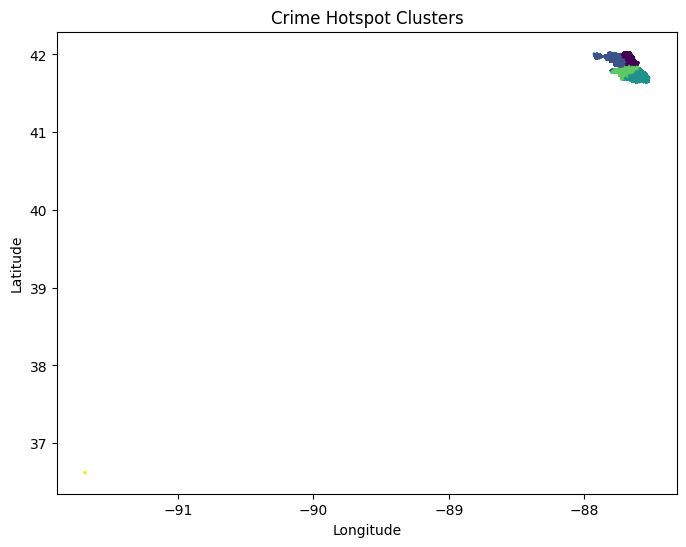

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["Cluster"],
    cmap="viridis",
    s=1
)

plt.title("Crime Hotspot Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Handling Geographic Outliers

During clustering, we observed that one cluster contained only 10 points.
This indicates the presence of extreme geographic outliers.

Outliers in latitude and longitude may occur due to:
- Data entry errors
- Incorrect GPS values
- Crimes recorded outside city boundaries

Before re-running clustering, we remove extreme coordinate values
to ensure meaningful hotspot detection.


In [14]:
print("Latitude range:", df["Latitude"].min(), "to", df["Latitude"].max())
print("Longitude range:", df["Longitude"].min(), "to", df["Longitude"].max())


Latitude range: 36.619446395 to 42.022575055
Longitude range: -91.686565684 to -87.524529378


## Removing Extreme Geographic Values

We restrict coordinates to a realistic Chicago boundary range
to remove geographic noise before clustering.


In [15]:
# Restrict to realistic Chicago geographic range
df = df[
    (df["Latitude"] > 41) & (df["Latitude"] < 42.5) &
    (df["Longitude"] > -88) & (df["Longitude"] < -87)
]

print("Shape after removing outliers:", df.shape)


Shape after removing outliers: (192642, 27)


## Re-running KMeans Clustering After Cleaning

After removing geographic outliers, we apply KMeans again
to identify meaningful crime hotspot zones.


In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Latitude", "Longitude"]])

print("New cluster distribution:")
print(df["Cluster"].value_counts())


New cluster distribution:
Cluster
3    52820
0    47968
1    47499
2    44355
Name: count, dtype: int64


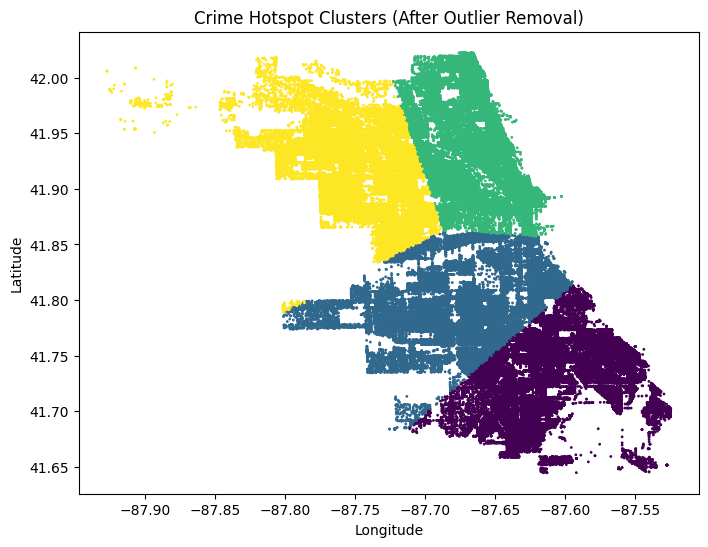

In [17]:
plt.figure(figsize=(8,6))

plt.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["Cluster"],
    cmap="viridis",
    s=1
)

plt.title("Crime Hotspot Clusters (After Outlier Removal)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Cluster Distribution Analysis

We analyze how many crimes belong to each hotspot cluster
to understand relative crime density.


In [18]:
cluster_counts = df["Cluster"].value_counts().sort_index()

print("Crimes per Cluster:")
print(cluster_counts)

cluster_percentage = (cluster_counts / len(df)) * 100

print("\nCluster Percentage Distribution:")
print(cluster_percentage)


Crimes per Cluster:
Cluster
0    47968
1    47499
2    44355
3    52820
Name: count, dtype: int64

Cluster Percentage Distribution:
Cluster
0    24.900074
1    24.656617
2    23.024574
3    27.418735
Name: count, dtype: float64


We calculated the number of crimes per cluster and then converted them into percentages to understand the distribution of crime across different hotspot regions. This helps identify which region contributes the highest proportion of total crimes

## WEEK-2 DAY-3 

## Visualizing Cluster Centroids

Each KMeans cluster has a centroid representing the center 
of a crime hotspot region.

We plot centroids on the map to visualize hotspot centers.

In [19]:
centroids = kmeans.cluster_centers_

print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[ 41.7348864  -87.60587732]
 [ 41.79462897 -87.6714865 ]
 [ 41.92656693 -87.66047626]
 [ 41.90460525 -87.74225331]]


## Visualizing Hotspot Centers

We plot the crime clusters along with their centroids.
Red "X" markers indicate the center of each hotspot region.
This plot visualizes clustered crime locations along with their centroids. Each colored region represents a crime hotspot identified using KMeans. The red X markers represent the centroid, which is the average location of crimes within each cluster.

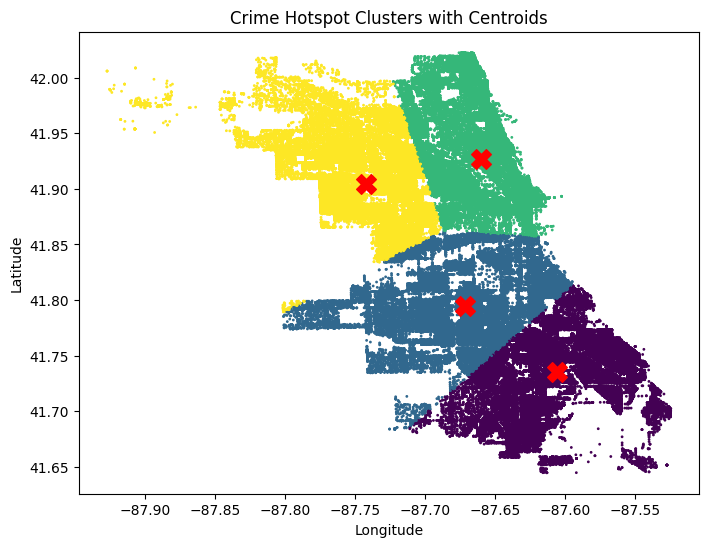

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plot clustered crime points
plt.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["Cluster"],
    cmap="viridis",
    s=1
)

# Plot centroids
plt.scatter(
    centroids[:, 1],   # longitude
    centroids[:, 0],   # latitude
    c="red",
    s=200,
    marker="X"
)

plt.title("Crime Hotspot Clusters with Centroids")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Identifying the Highest Risk Cluster

We determine which cluster contains the highest number of crimes.
This cluster represents the highest-risk hotspot region.

In [21]:
highest_cluster = cluster_counts.idxmax()

print("Highest Risk Cluster:", highest_cluster)

Highest Risk Cluster: 3


## Assigning Risk Levels to Hotspot Clusters

Based on cluster crime distribution, we assign risk levels:

- Highest crime cluster → High Risk
- Next two clusters → Medium Risk
- Lowest crime cluster → Low Risk

This transforms clustering output into actionable intelligence.

In [22]:
# Sort clusters by crime count (descending)
sorted_clusters = cluster_counts.sort_values(ascending=False)

risk_labels = {}

risk_labels[sorted_clusters.index[0]] = "High Risk"
risk_labels[sorted_clusters.index[1]] = "Medium Risk"
risk_labels[sorted_clusters.index[2]] = "Medium Risk"
risk_labels[sorted_clusters.index[3]] = "Low Risk"

# Map risk labels to dataframe
df["Risk_Level"] = df["Cluster"].map(risk_labels)

print("Risk distribution:")
print(df["Risk_Level"].value_counts())

Risk distribution:
Risk_Level
Medium Risk    95467
High Risk      52820
Low Risk       44355
Name: count, dtype: int64


## W-2 DAY-4 

## Visualizing Crime Risk Zones

Instead of displaying raw cluster numbers,
we visualize crime zones based on assigned risk levels:

- High Risk
- Medium Risk
- Low Risk

This provides a clearer and more actionable representation
for decision-makers.

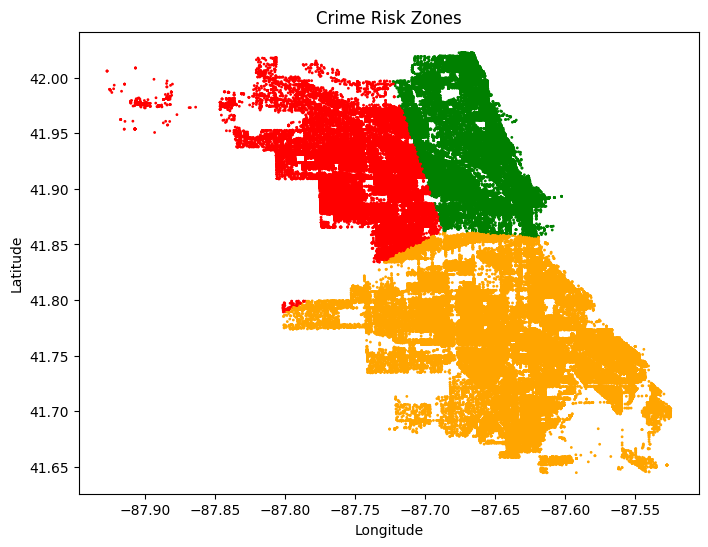

In [23]:
plt.figure(figsize=(8,6))

# Assign colors manually for clarity
risk_colors = {
    "High Risk": "red",
    "Medium Risk": "orange",
    "Low Risk": "green"
}

colors = df["Risk_Level"].map(risk_colors)

plt.scatter(
    df["Longitude"],
    df["Latitude"],
    c=colors,
    s=1
)

plt.title("Crime Risk Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Correcting Risk Level Assignment

We ensure that the cluster with the highest crime count
is always labeled as "High Risk".

Risk levels are assigned dynamically based on crime frequency ranking.

In [24]:
# Recalculate cluster counts
cluster_counts = df["Cluster"].value_counts().sort_values(ascending=False)

# Create new risk mapping
risk_labels = {}

for i, cluster_id in enumerate(cluster_counts.index):
    if i == 0:
        risk_labels[cluster_id] = "High Risk"
    elif i in [1, 2]:
        risk_labels[cluster_id] = "Medium Risk"
    else:
        risk_labels[cluster_id] = "Low Risk"

# Apply mapping
df["Risk_Level"] = df["Cluster"].map(risk_labels)

# Verify
print("Updated Risk Distribution:")
print(df["Risk_Level"].value_counts())

Updated Risk Distribution:
Risk_Level
Medium Risk    95467
High Risk      52820
Low Risk       44355
Name: count, dtype: int64


In [30]:
df.rename(columns={"Cluster": "Cluster_ID"}, inplace=True)

## Creating Structured Hotspot Intelligence Summary

We generate a structured table containing:

- Cluster ID
- Crime count
- Crime percentage
- Risk level
- Centroid latitude
- Centroid longitude

This transforms our clustering model into actionable intelligence output.

In [31]:
# Ensure cluster counts are sorted by crime count (descending)
cluster_counts = df["Cluster_ID"].value_counts().sort_values(ascending=False)

# Calculate percentage properly
cluster_percentage = (cluster_counts / len(df)) * 100

# Build summary table
summary_table = pd.DataFrame({
    "Cluster_ID": cluster_counts.index,
    "Crime_Count": cluster_counts.values,
    "Crime_Percentage (%)": cluster_percentage.values
})

# Map Risk Level
summary_table["Risk_Level"] = summary_table["Cluster_ID"].map(risk_labels)

# Add Centroid Coordinates
summary_table["Centroid_Latitude"] = summary_table["Cluster_ID"].apply(
    lambda x: centroids[x][0]
)

summary_table["Centroid_Longitude"] = summary_table["Cluster_ID"].apply(
    lambda x: centroids[x][1]
)

# Format Crime Percentage to 2 decimal places
summary_table["Crime_Percentage (%)"] = summary_table["Crime_Percentage (%)"].round(2)

# Reset index and create Sr_No starting from 1
summary_table = summary_table.reset_index(drop=True)
summary_table.insert(0, "Sr_No", range(1, len(summary_table)+1))

summary_table

,Sr_No,Cluster_ID,Crime_Count,Crime_Percentage (%),Risk_Level,Centroid_Latitude,Centroid_Longitude
0,1,3,52820,27.42,High Risk,41.904605,-87.742253
1,2,0,47968,24.90,Medium Risk,41.734886,-87.605877
2,3,1,47499,24.66,Medium Risk,41.794629,-87.671487
3,4,2,44355,23.02,Low Risk,41.926567,-87.660476


## Exporting Final Crime Intelligence Dataset

We export the processed dataset including:
- Engineered features
- Cluster_ID
- Risk_Level

This dataset can be used for dashboards or predictive modeling.

In [32]:
import os

# Create processed folder if it doesn't exist
os.makedirs("../data/processed", exist_ok=True)

df.to_csv("../data/processed/crime_intelligence_dataset.csv", index=False)

print("Crime intelligence dataset exported successfully.")

Crime intelligence dataset exported successfully.


## Exporting Hotspot Summary Table

We export the structured hotspot intelligence table
for reporting and visualization purposes.

In [33]:
summary_table.to_csv("../data/processed/hotspot_summary.csv", index=False)

print("Hotspot summary exported successfully.")

Hotspot summary exported successfully.


## Saving Trained KMeans Model

We save the trained clustering model so that
it can be reused without retraining.

In [34]:
os.makedirs("../models", exist_ok=True)

import joblib

joblib.dump(kmeans, "../models/kmeans_hotspot_model.pkl")

print("KMeans model saved successfully.")

KMeans model saved successfully.
